# Projet Detection des fraudes dans les cartes de credit

## Observation des données

In [138]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, scale, LabelEncoder
from sklearn.model_selection import train_test_split

In [139]:
#read dataset
df = pd.read_csv('creditcard.csv')

In [140]:
df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [141]:
df.shape

(3075, 12)

In [142]:
df.dtypes

Merchant_id                         int64
Transaction date                  float64
Average Amount/transaction/day    float64
Transaction_amount                float64
Is declined                        object
Total Number of declines/day        int64
isForeignTransaction               object
isHighRiskCountry                  object
Daily_chargeback_avg_amt            int64
6_month_avg_chbk_amt              float64
6-month_chbk_freq                   int64
isFradulent                        object
dtype: object

In [143]:
#trouver ls colonnes avec des null
df.isnull().sum()

Merchant_id                          0
Transaction date                  3075
Average Amount/transaction/day       0
Transaction_amount                   0
Is declined                          0
Total Number of declines/day         0
isForeignTransaction                 0
isHighRiskCountry                    0
Daily_chargeback_avg_amt             0
6_month_avg_chbk_amt                 0
6-month_chbk_freq                    0
isFradulent                          0
dtype: int64

## Nettoyage des données

In [144]:
#droper les colonnes avec des nulls ou inutiles pour le modèle
df = df.drop(['Transaction date','Merchant_id'], axis = 1)

## Pour la classifiaction nous avons besoin de features numériques et non catégoriques 

In [145]:
# convertir les valeurs catégoriques(de type object) en numérique
df['isFradulent'] = df.isFradulent.replace({'N': 0, 'Y': 1})
df['Is declined'] = df['Is declined'].replace({'N': 0, 'Y': 1})
df['isForeignTransaction'] = df['isForeignTransaction'].replace({'N': 0, 'Y': 1})
df['isHighRiskCountry'] = df['isHighRiskCountry'].replace({'N': 0, 'Y': 1})

In [146]:
#compter le nombre d'examples par chaque classe à prédire
df['isFradulent'].value_counts()

0    2627
1     448
Name: isFradulent, dtype: int64

In [147]:
# Vérifier les types 
df.dtypes

Average Amount/transaction/day    float64
Transaction_amount                float64
Is declined                         int64
Total Number of declines/day        int64
isForeignTransaction                int64
isHighRiskCountry                   int64
Daily_chargeback_avg_amt            int64
6_month_avg_chbk_amt              float64
6-month_chbk_freq                   int64
isFradulent                         int64
dtype: object

## Et voilà que des valeurs numériques !

In [148]:
df.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,500.0,26000.0,0,0,1,1,800,677.2,6,1


# Feature engineering 

#### Cette partie consiste à séparer les featrures X et les labels Y

In [149]:
X = df.drop(['isFradulent'], axis=1)
Y = df['isFradulent']

In [150]:
X.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,100.0,3000.0,0,5,1,1,0,0.0,0
1,100.0,4300.0,0,5,1,1,0,0.0,0
2,185.5,4823.0,1,5,0,0,0,0.0,0
3,185.5,5008.5,1,8,0,0,0,0.0,0
4,500.0,26000.0,0,0,1,1,800,677.2,6


## Importance du Feature Scaling

Nous allons prendre les valeurs de X et appliquer la fonction scale() 

In [174]:
x = scale(X)

C:\Users\Formation\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


### Nous avons besoin de splitter le dataset  : train et test

In [175]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, 
                                                    test_size=0.3, 
                                                    random_state=42, stratify=Y)

In [176]:
assert(X_train.shape[0] == y_train.shape[0])
X_train.shape

(2152, 9)

## La matrice de corrélation pour mieux voir la corrélation entre les varaibles 

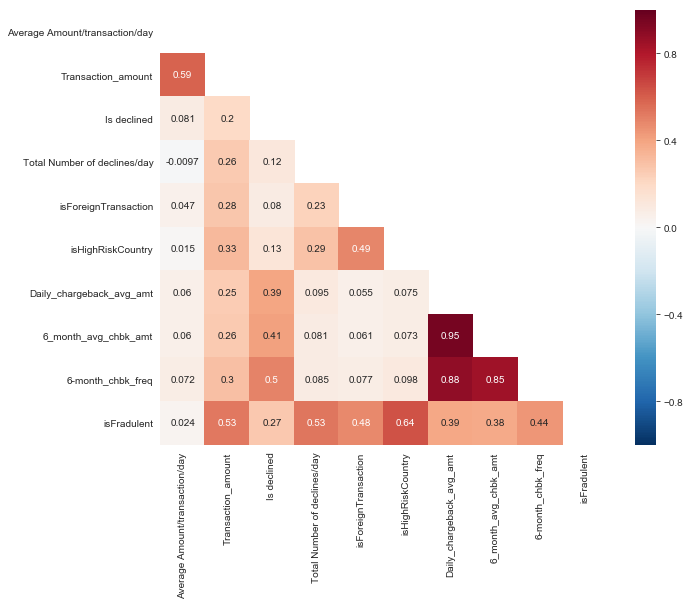

In [182]:
# la matricre de corrélation entre les variables
corr = df.corr()
# mask for the upper triangle
cleanning_mask = np.zeros_like(corr)
upper_triangle = np.triu_indices_from(corr)
cleanning_mask[upper_triangle] = 1
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
           mask=cleanning_mask,
           annot=True,
           cmap='RdBu_r',
           vmin=-1,
           vmax=1)
plt.show()

#### Les heatmap foncés pour les grandes corrélations

## Et maintenant , nous fittons le modèle

In [183]:
#fitter notre modèle avec svm
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

C:\Users\Formation\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [184]:
#créer des prédictions
predictions = clf.predict(X_test)
print("Size of training set: ", X_test.shape)
print(predictions.shape)

Size of training set:  (923, 9)
(923,)


## Matrice de confusion
Permet de savoir le nombre des bonnes et des mauvaises prédictions pour chaque classe: sur la diagonale, c'est les bonnes et ailleurs c'est le nombres de prédictions fausses.

In [185]:
# Matrice de confusion 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[783   6]
 [  6 128]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       789
           1       0.96      0.96      0.96       134

   micro avg       0.99      0.99      0.99       923
   macro avg       0.97      0.97      0.97       923
weighted avg       0.99      0.99      0.99       923



## Scores

In [181]:
# Afficher les scores 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9869989165763814

### Pas mal avec les valeurs par défaut de SVM nous arrivons à un bon score  :)